In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("C:\\Users\\shinz\\Downloads\\archive (3)\\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data_summary = df.describe()
data_summary

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
missing_values = df.isnull().sum()
missing_values
# there is no missing values in dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
class_distribution = df["diabetes"].value_counts()
class_distribution
# In data exploration and preprocessing, I am doing this analysis of target varaible diabeties to understand the balance or 
#imbalance of classes in a classification problem. This means that there are 91500 instances with the value 0 (non-diabetic) 
#and 8500 instances with the value 1 (diabetic) in the "diabetes" column of the Data Frame. We might need to use some 
#techniques to balance the classes

0    91500
1     8500
Name: diabetes, dtype: int64

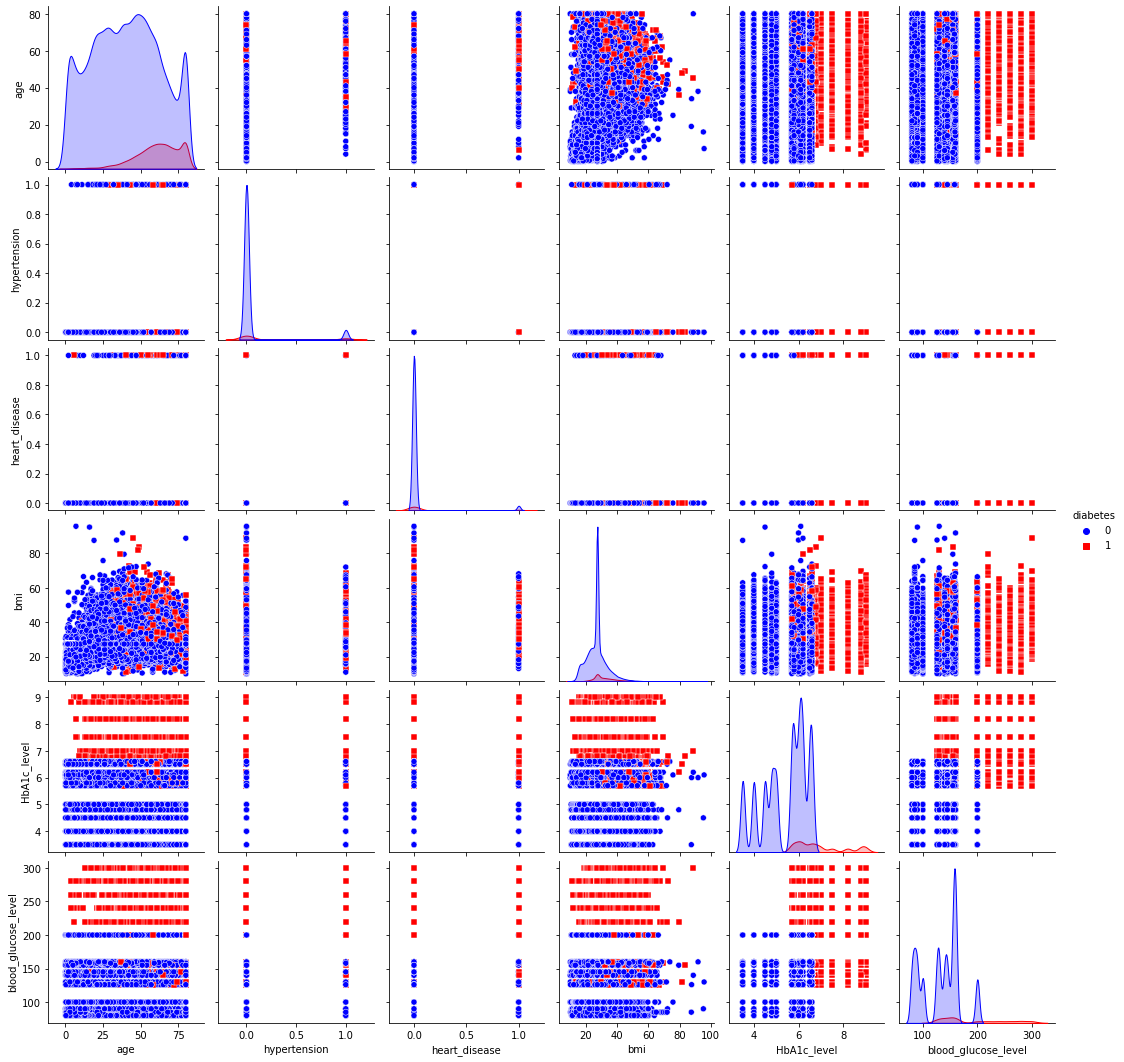

In [18]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df, hue="diabetes", markers=[
             "o", "s"], palette={0: "blue", 1: "red"})
plt.show()
# we are able to distrubiton of all vairables along the daigonal and the relationship between the variables in 
#the upper and lower triangles.

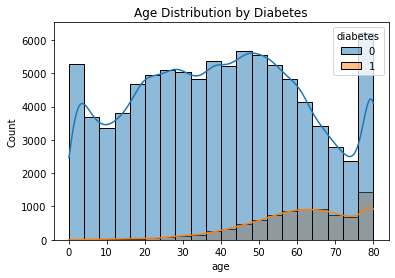

In [19]:
# Distribution of age
sns.histplot(df, x="age", hue="diabetes", kde=True, bins=20)
plt.title("Age Distribution by Diabetes")
plt.show()

# The result is a histogram plot showing the distribution of ages, with separate bars for non-diabetic and diabetic
# individuals. This graph shows that people from age 0 to 30 less chances of diabetes as person gets older
# there is more chances of getting diabetes.

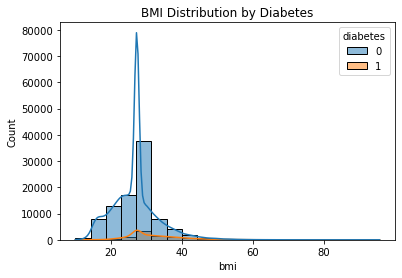

In [20]:
# Distribution of BMI
sns.histplot(df, x="bmi", hue="diabetes", kde=True, bins=20)
plt.title("BMI Distribution by Diabetes")
plt.show()

# BMI is a continuous numerical variable that measures the relative body fat based on an individual's weight and height.
# This visualization is useful for understanding how BMI is distributed among individuals with and without diabetes, potentially
# revealing insights into the relationship between BMI and diabetes status in the dataset. The people with BMI 0-20 has less
# or no chances of having diabetes, if BMI is greater then 20 that has more chances of getting diabetes.

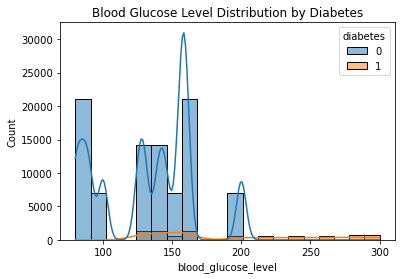

In [21]:
# Distribution of blood glucose level
sns.histplot(df, x="blood_glucose_level", hue="diabetes", kde=True, bins=20)
plt.title("Blood Glucose Level Distribution by Diabetes")
plt.show()

# In this, there are 20 bins representing different blood glucose level ranges. This visualization allows me to compare the
# blood glucose level distributions between the two categories and provides insights into how blood glucose levels are
# distributed among individuals with and without diabetes. This graph represents that higher the blood glucose level there is
# more chances of diagnose with diabetes. if your blood glucose level is higher than 100 means person is prediabetic or having
# diabeties

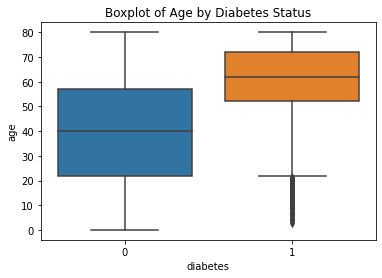

In [22]:
# Boxplot of age by diabetes status
sns.boxplot(data=df, x="diabetes", y="age")
plt.title("Boxplot of Age by Diabetes Status")
plt.show()

# in this box plot 0 represents non-diabetes and 1 represents diabetes
# In this it shows that median age of daibetic people is above 60 and median age of non diabetic people is 40.
# in this dataset the people with daibeties are more in age.

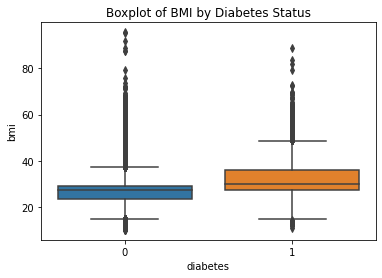

In [23]:
# Boxplot of BMI by diabetes status
sns.boxplot(data=df, x="diabetes", y="bmi")
plt.title("Boxplot of BMI by Diabetes Status")
plt.show()

# there is alot of outliers in the BMI.
# the medain of BMI of non-diabetes is 30 while the median of daibetic patients is above 30.

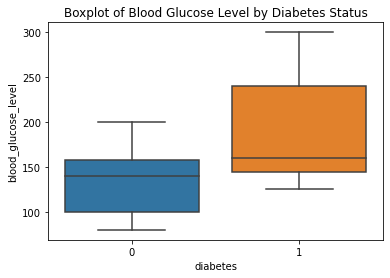

In [24]:
# Boxplot of blood glucose level by diabetes status
sns.boxplot(data=df, x="diabetes", y="blood_glucose_level")
plt.title("Boxplot of Blood Glucose Level by Diabetes Status")
plt.show()

# the blood glucose level and diabetes does not have outliers.
# the median value blood glucose level for non-diabetic is less than 150.
# the median value blood glucose level for diabetic is greater than 150.
# the boxplot if diatbetic patients is more wider mean the higher blood glucose level, more cahnces of having diatbetes

In [8]:
# Data selection: Selecting relevant features and target variable
features = df[
    [
        "gender",
        "age",
        "hypertension",
        "heart_disease",
        "smoking_history",
        "bmi",
        "HbA1c_level",
        "blood_glucose_level",
    ]
]
target = df["diabetes"]

# This code is to perform feature selection, I am selecting specific columns (features) from a Data Frame to use in a machine
# learning or data analysis.

# These features are the variables that I will use to make predictions or analyze the relationships.
# The selected features are:
# •"gender": Gender of individuals.
# •"age": Age of individuals.
# •"hypertension": Presence of hypertension (binary variable, 0 for no, 1 for yes).
# •"Heart disease": Presence of heart disease (binary variable).
# •"Smoking history": Smoking history or status (categorical variable).
# •"bmi": Body Mass Index.
# •"HbA1c_level": Level of HbA1c, a measure of blood sugar control.
# •"blood_glucose_level": Blood glucose level.

# The target variable (Diabetes)I want to predict or model. “diabetes" is a binary variable (0 for non-diabetic and 1 for
# diabetic)

In [9]:
label_encoder = LabelEncoder()
features["gender"] = label_encoder.fit_transform(features["gender"])
features["smoking_history"] = label_encoder.fit_transform(features["smoking_history"])

# The "gender" and "smoking history" columns in the "features" Data Frame are categorical variables. To be used in machine
# learning model I am converting them to the numerical labels which requires numerical input.

C:\Users\shinz\AppData\Local\Temp\ipykernel_9944\612514096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["gender"] = label_encoder.fit_transform(features["gender"])
C:\Users\shinz\AppData\Local\Temp\ipykernel_9944\612514096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["smoking_history"] = label_encoder.fit_transform(features["smoking_history"])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Features:in this features represents the independent variables and will be used to make predictions
# target: Diabeties is the dependent variable that i want to predict and analyze
# in this we are splitting the dataset into training and testing set.
# the 20% of the data will be reserved for testing, while the remaining 80% will be used for training the machine learning model.

In [16]:
# Standardize numerical features (age, bmi, HbA1c_level, blood_glucose_level)
scaler = StandardScaler()
X_train[["age", "bmi", "HbA1c_level", "blood_glucose_level"]] = scaler.fit_transform(
    X_train[["age", "bmi", "HbA1c_level", "blood_glucose_level"]]
)
X_test[["age", "bmi", "HbA1c_level", "blood_glucose_level"]] = scaler.transform(
    X_test[["age", "bmi", "HbA1c_level", "blood_glucose_level"]]
)

# The fit_transform method of the StandardScaler scales the selected features in the training data. it computes
# the mean and standard deviation for the selected features, and the transform part scales the data based on these statistics.
# standard scaler will do samething for testing data too.
# the "age," "bmi," "HbA1c_level," and "blood_glucose_level" features in both the training and testing sets will be standardized.
# Standardization transforms these features to have a mean of 0 and a standard deviation of 1, making them suitable for machine
# learning algorithms that are sensitive to feature scales.

In [17]:
classifiers = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Support Vector Machine", SVC(kernel="linear", random_state=42)),
]

# in thsi code i have defined a list of machine learning classifiers,Random forest, Logistic regression and Support vector
# Machine, which is associated with a specific name or label.
# I will iterate over them and apply each classifier to the data, to compare their performance and choose the one
# that works best for the machine learning

In [18]:
# Define a cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# The StratifiedKFold cross-validation strategy is useful when dealing with imbalanced datasets It helps ensure that
# each fold has a representative sample of all classes, which can lead to more reliable and unbiased model evaluation.

In [19]:
import numpy as np

andom_forest_importances = None
feature_names = None

for name, classifier in classifiers:
    print(f"Classifier: {name}")
    scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring="accuracy")
    print(f"Cross-Validation Accuracy: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

    # Fit the model on the training data
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    print("-" * 40)

    if name == "Random Forest":
        random_forest_importances = classifier.feature_importances_
        feature_names = X_train.columns


# This code goes through each classifier, performs cross-validation to assess its performance on the training data,
# fits the classifier to the training data, makes predictions on the test data, and evaluates the model's performance on the
# test data. The results will allow to compare their performance.

# Random forest
# cross-validation accuracy for the Random Forest classifier is 97%
# Precision for class 0 (non-diabetic) is 97%, and for class 1 (diabetic), it is 95%.
# This shows how well the classifier predicts each class.
# Recall (also known as sensitivity) for class 0 is 100%, indicating that almost all actual non-diabetic cases are correctly identified.
# However, the recall for class 1 is 69%, meaning that some diabetic cases are missed.
# The F1-score combines precision and recall, with a value of 0.98 for class 0 and 0.80 for class 1.
# An F1-score of 1 is the best possible value.

# Logistic Regression
# Cross-Validation Accuracy: 0.96: The mean cross-validation accuracy for Logistic Regression is 96%, with low standard deviation (0.00)
# Precision for class 0 is 96%, and for class 1, it is 86%.
# Recall for class 0 is 99%, but for class 1, it's lower at 61%.
# The F1-scores are 0.98 for class 0 and 0.72 for class 1.

# Support Vector Machine:
# Cross-Validation Accuracy: 0.96: The mean cross-validation accuracy for the SVM classifier is 96%, with low standard deviation (0.00).
# Precision for class 0 is 96%, and for class 1, it's 92%.
# Recall for class 0 is 100%, while recall for class 1 is 57%.
# The F1-scores are 0.98 for class 0 and 0.71 for class 1.

# all three classifiers show strong performance in terms of accuracy. The Random Forest classifier achieves the highest accuracy,
# while the Logistic Regression and SVM classifiers have slightly lower accuracy but still perform well.

Classifier: Random Forest
Cross-Validation Accuracy: 0.97 (± 0.00)
Test Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

----------------------------------------
Classifier: Logistic Regression
Cross-Validation Accuracy: 0.96 (± 0.00)
Test Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

----------------------------------------
Classifier: Support Vector Machine
Cro

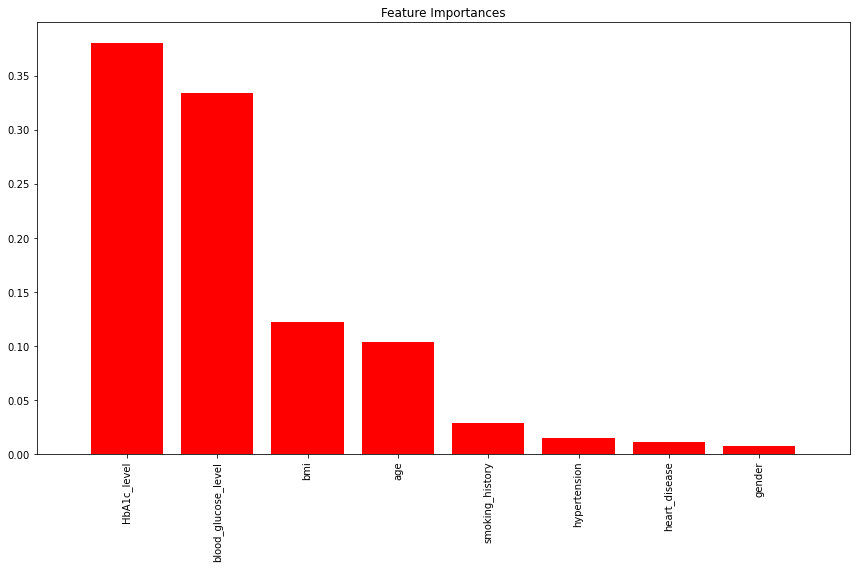

In [23]:
if random_forest_importances is not None:
    indices = np.argsort(random_forest_importances)[::-1]
    sorted_feature_names = feature_names[indices]

    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(
        range(len(random_forest_importances)),
        random_forest_importances[indices],
        color="r",
        align="center",
    )
    plt.xticks(range(len(random_forest_importances)), sorted_feature_names, rotation=90)
    plt.xlim([-1, len(random_forest_importances)])
    plt.tight_layout()
    plt.show()

# The random forest classifier has a feature_importances_ attribute that contains the feature importances calculated. 
#From the graph, we can see that hbA1c_level and blood_glucose_level are the most important features for predicting diabetes.

In [20]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# pip install imbalanced-learn

In [21]:
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# In this code, X_train_resampled and y_train_resampled will contain the resampled training data, which is balanced with respect
# to the target variable. The synthetic samples created by SMOTE are designed to be similar to the existing examples in the
# minority class but with some variation to prevent overfitting. This technique helps to improve the performance of machine learning models
# on imbalanced datasets by reducing the bias toward the majority class.

In [22]:
for name, classifier in classifiers:
    print(f"Classifier: {name}")
    scores = cross_val_score(
        classifier, X_train_resampled, y_train_resampled, cv=cv, scoring="accuracy"
    )
    print(f"Cross-Validation Accuracy: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

    # Fit the model on the training data
    classifier.fit(X_train_resampled, y_train_resampled)

    # Predict on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    print("-" * 40)

# after applying SMOTE to address class imbalance.following is the analysis of the results:

# Random Forest

# Cross-Validation Accuracy: 0.98:The mean cross-validation accuracy for the Random Forest classifier is 98%, and the standard
# deviation is very low (0.00), indicating consistent performance across folds.

# Precision for class 0 (non-diabetic) is 98%, and for class 1 (diabetic), it is 76%. This shows how well the classifier predicts
# each class.
# Recall (also known as sensitivity) for class 0 is 98%, indicating that almost all actual non-diabetic cases are correctly
# identified. The recall for class 1 is 75%.
# The F1-score combines precision and recall, with a value of 0.98 for class 0 and 0.75 for class 1. An F1-score of 1 is the
# best possible value.

# Logistic Regression

# Cross-Validation Accuracy: 0.89: The mean cross-validation accuracy for Logistic Regression is 89%, with low standard
# deviation (0.00).
# Precision for class 0 is 99%, and for class 1, it is 42%. This shows that the classifier is better at predicting class 0.
# Recall for class 0 is 89%, while recall for class 1 is relatively high at 88%.
# The F1-scores are 0.93 for class 0 and 0.57 for class 1.

# Support Vector Machine (SVM)

# Cross-Validation Accuracy: 0.89: The mean cross-validation accuracy for the SVM classifier is 89%,
# with low standard deviation (0.00).

# Precision for class 0 is 99%, and for class 1, it is 42%. As with Logistic Regression, the classifier is better at predicting
# class 0.
# Recall for class 0 is 89%, while recall for class 1 is relatively high at 88%.
# The F1-scores are 0.93 for class 0 and 0.57 for class 1.

# In summary, the classifiers have varying levels of performance. Random Forest has the highest accuracy and F1-score for
# both classes, indicating good overall performance. Logistic Regression and SVM have lower precision and F1-scores
# for the minority class (class 1), suggesting that they are less effective at correctly identifying diabetic cases.

# However the accuracy has been dropped after balancing the data, we do not really need it

Classifier: Random Forest
Cross-Validation Accuracy: 0.98 (± 0.00)
Test Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.76      0.75      0.75      1708

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000

----------------------------------------
Classifier: Logistic Regression
Cross-Validation Accuracy: 0.89 (± 0.00)
Test Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18292
           1       0.42      0.88      0.57      1708

    accuracy                           0.89     20000
   macro avg       0.70      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

----------------------------------------
Classifier: Support Vector Machine
Cro